# **1. *Parametrized Quantum Circuits***

Parametrized Quantum Circuits or Anzats or Variational Ciruits are quantum ciruits, where the gates are defined through tunable parameters.

Example: 

Parameterized circuit, with two parameterized gates, a single-qubit $z$-rotation gate, with a variable $\theta$ rotation , followed by a two-qubit controlled $z$-rotation gate, with the same variable rotation $\theta$

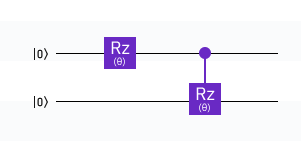

In [6]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta,0,1)
qc.draw()

┌───────┐         
q_0: ┤ Rz(θ) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ Rz(θ) ├
              └───────┘

Implement the above Parametrized Circuit but with different parameters:

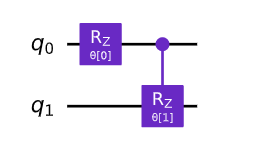

In [8]:
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw()

┌──────────┐            
q_0: ┤ Rz(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Rz(θ[1]) ├
                 └──────────┘

# **1.1. *Properties of Parametrized Quantum Circuits***

To use *Parametrized Quantum Circuits* as machine learning model, they should generalize well.
This means that the ciruit must be able to generate a significant subsets within the output Hibert Space.

Q: How to choose one parametrized circuit over the other?
Expressibility and Entangling Capability can be used to discriminate b/n anzats.

- The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space.

- The entangling capability of a circuit describes its ability to generate entangled states.

Note:  
- there is a strong correlation between classification accuracy and expressibility, and a weak correlation between classification accuracy entangling capability.
 - In this era of near term quantum computing, where devices have limited qubit connectivity, coherence times and gate fidiliteis, the depth of the circuits we run directly affects the accuracy of our results, since there is limited error correction or mitigation.


# **1.1. *Parametrized Quantum Circuits for Machine Learning***

In quantum machine learning, parameterized quantum circuits tend to be used for two things:

    - To encode data, where the parameters are determined by the data being encoded
    - As a quantum model, where the parameters are determined by an optimization process.

In [11]:
# ZZFeatureMap

from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

Documentation

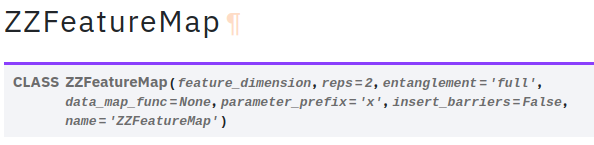

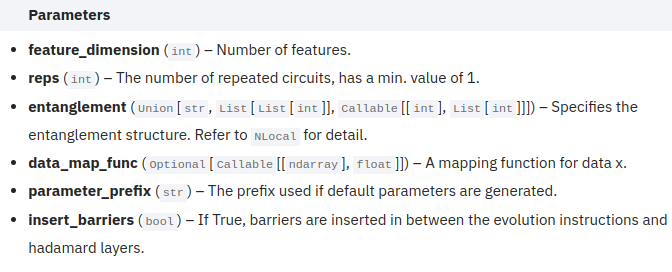


In [13]:
# TwoLocal Circuit

from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'], 
                       entanglement_blocks='cz', skip_final_rotation_layer=True,
                       insert_barriers=True)

qc_twolocal.decompose().draw()

┌──────────┐┌──────────┐ ░           ░ ┌──────────┐ ┌──────────┐ ░       »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░──■──■─────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░──■──■─»
     ├──────────┤├──────────┤ ░  │  │     ░ ├──────────┤┌┴──────────┤ ░  │  │ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░──■──┼──■──░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░──■──┼─»
     ├──────────┤├──────────┤ ░     │  │  ░ ├──────────┤├───────────┤ ░     │ »
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─░─────■──■──░─┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─░─────■─»
     └──────────┘└──────────┘ ░           ░ └──────────┘└───────────┘ ░       »
«        
«q_0: ───
«        
«q_1: ─■─
«      │ 
«q_2: ─■─
«

In [14]:
qc_13 = TwoLocal(3, rotation_blocks='ry',
                 entanglement_blocks='crz', entanglement='sca',
                 reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)

qc_13.decompose().draw()

┌──────────┐ ░ ┌──────────┐                         ░ ┌──────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├─░─┤ Rz(θ[3]) ├─────■───────────────────░─┤ Ry(θ[6]) ├─░─»
     ├──────────┤ ░ └────┬─────┘┌────┴─────┐             ░ ├──────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├─░──────┼──────┤ Rz(θ[4]) ├─────■───────░─┤ Ry(θ[7]) ├─░─»
     ├──────────┤ ░      │      └──────────┘┌────┴─────┐ ░ ├──────────┤ ░ »
q_2: ┤ Ry(θ[2]) ├─░──────■──────────────────┤ Rz(θ[5]) ├─░─┤ Ry(θ[8]) ├─░─»
     └──────────┘ ░                         └──────────┘ ░ └──────────┘ ░ »
«                              ┌───────────┐ ░ ┌───────────┐ ░              »
«q_0: ──────────────────■──────┤ Rz(θ[11]) ├─░─┤ Ry(θ[12]) ├─░───────■──────»
«     ┌──────────┐      │      └─────┬─────┘ ░ ├───────────┤ ░ ┌─────┴─────┐»
«q_1: ┤ Rz(θ[9]) ├──────┼────────────■───────░─┤ Ry(θ[13]) ├─░─┤ Rz(θ[15]) ├»
«     └────┬─────┘┌─────┴─────┐              ░ ├───────────┤ ░ └───────────┘»
«q_2: ─────■──────┤ Rz(θ[10]) ├──────────────░─┤ Ry(θ[14]) ├─░──────────────»
«                 └───────────┘              ░ └───────────┘ ░              »
«                  ┌───────────┐
«q_0: ─────────────┤ Rz(θ[17]) ├
«                  └─────┬─────┘
«q_1: ──────■────────────┼──────
«     ┌─────┴─────┐      │      
«q_2: ┤ Rz(θ[16]) ├──────■──────
«     └───────────┘

In [15]:
# NLocal Circuit

from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw()

┌──────────┐ ░                                                 »
q_0: ┤ Ry(θ[0]) ├─░──────■──────────────────────────────────────────»
     ├──────────┤ ░ ┌────┴─────┐                                    »
q_1: ┤ Rz(θ[1]) ├─░─┤ Rx(θ[6]) ├─────■───────────────────────■──────»
     ├──────────┤ ░ └──────────┘┌────┴─────┐            ┌────┴─────┐»
q_2: ┤ Ry(θ[2]) ├─░─────────────┤ Rx(θ[7]) ├─────■──────┤ Rx(θ[9]) ├»
     ├──────────┤ ░             └──────────┘┌────┴─────┐└──────────┘»
q_3: ┤ Rz(θ[3]) ├─░─────────────────────────┤ Rx(θ[8]) ├────────────»
     ├──────────┤ ░                         └──────────┘            »
q_4: ┤ Ry(θ[4]) ├─░─────────────────────────────────────────────────»
     ├──────────┤ ░                                                 »
q_5: ┤ Rz(θ[5]) ├─░─────────────────────────────────────────────────»
     └──────────┘ ░                                                 »
«                                                                      
«q_0: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_1: ─────────────────────────────────────────────────────────────────
«                                                                      
«q_2: ──────■─────────────────────────■────────────────────────────────
«     ┌─────┴─────┐             ┌─────┴─────┐                          
«q_3: ┤ Rx(θ[10]) ├──────■──────┤ Rx(θ[12]) ├──────■───────────────────
«     └───────────┘┌─────┴─────┐└───────────┘┌─────┴─────┐             
«q_4: ─────────────┤ Rx(θ[11]) ├─────────────┤ Rx(θ[13]) ├──────■──────
«                  └───────────┘             └───────────┘┌─────┴─────┐
«q_5: ────────────────────────────────────────────────────┤ Rx(θ[14]) ├
«                                                         └───────────┘